In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [6]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [7]:
df.shape

(200, 2)

In [8]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

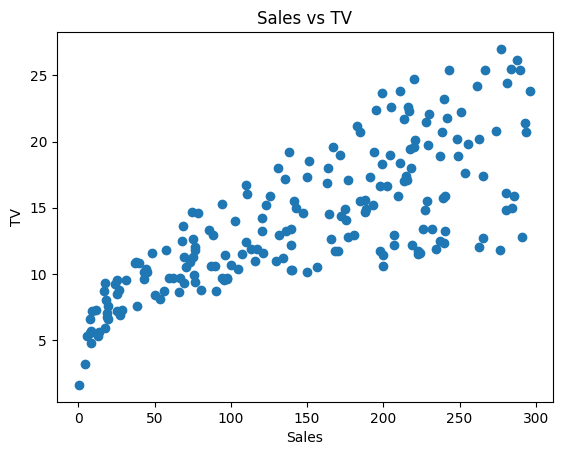

In [10]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('Sales vs TV')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

((140, 1), (140,), (60, 1), (60,))

In [88]:
# performing SLR without formulae

n = len(X_train)
sum_x = X_train.iloc[:,0].sum()
sum_y = y_train.sum()
sum_xy = (X_train.iloc[:,0] * y_train).sum()
sum_x2 = (X_train.iloc[:,0] ** 2).sum()
sum_whole = sum_x ** 2

val1 = (n * sum_xy) - (sum_x * sum_y)
val2 = (n * sum_x2) - sum_whole
theta1 = val1 / val2

theta0 = (sum_y - theta1 * sum_x) / n

print("Intercept (θ0):", theta0)
print("Slope (θ1):", theta1)
sum_xy

Intercept (θ0): 7.23945983075114
Slope (θ1): 0.04640780212815275


np.float64(362815.24)

In [91]:
y_pred = [theta0 + theta1 * x for x in X_test['TV']]
y_pred

[np.float64(14.817853918278484),
 np.float64(16.307544366592186),
 np.float64(20.83230507408708),
 np.float64(7.782431115650527),
 np.float64(17.46309863958319),
 np.float64(10.72468577057541),
 np.float64(17.300671332134655),
 np.float64(9.559849937158777),
 np.float64(17.560555024052313),
 np.float64(15.365465983390685),
 np.float64(8.701305597787952),
 np.float64(9.847578310353324),
 np.float64(18.12208942980296),
 np.float64(7.490061962243165),
 np.float64(13.713348227628448),
 np.float64(15.138067752962737),
 np.float64(7.578236786286655),
 np.float64(16.409641531274122),
 np.float64(10.733967331001042),
 np.float64(18.256672055974605),
 np.float64(17.890050419162197),
 np.float64(10.385908815039896),
 np.float64(9.002956311620945),
 np.float64(18.883177384704666),
 np.float64(10.44159817759368),
 np.float64(9.722277244607312),
 np.float64(17.14752558511175),
 np.float64(13.704066667202818),
 np.float64(11.28622017632606),
 np.float64(7.629285368627623),
 np.float64(16.51173869595

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()

model.fit(X_train, y_train)

model_y_pred = model.predict(X_test.values.reshape(-1, 1))

print("Intercept (θ0):", model.intercept_)
print("Slope (θ1):", model.coef_[0])
print("MSE:", mean_squared_error(y_test, model_y_pred))
print("R2 Score:", r2_score(y_test, model_y_pred))

for i in range(len(X_test)):
    print(f"X_test: {X_test.iloc[i, 0]}, y_pred: {y_pred[i]}, model_y_pred: {model_y_pred[i]}")


Intercept (θ0): 7.239459830751138
Slope (θ1): 0.046407802128152764
MSE: 8.970991242413614
R2 Score: 0.6714477229302764
X_test: 163.3, y_pred: 14.817853918278484, model_y_pred: 14.817853918278484
X_test: 195.4, y_pred: 16.30754436659219, model_y_pred: 16.30754436659219
X_test: 292.9, y_pred: 20.83230507408708, model_y_pred: 20.83230507408708
X_test: 11.7, y_pred: 7.7824311156505255, model_y_pred: 7.7824311156505255
X_test: 220.3, y_pred: 17.463098639583194, model_y_pred: 17.463098639583194
X_test: 75.1, y_pred: 10.72468577057541, model_y_pred: 10.72468577057541
X_test: 216.8, y_pred: 17.30067133213466, model_y_pred: 17.30067133213466
X_test: 50.0, y_pred: 9.559849937158777, model_y_pred: 9.559849937158777
X_test: 222.4, y_pred: 17.560555024052313, model_y_pred: 17.560555024052313
X_test: 175.1, y_pred: 15.365465983390688, model_y_pred: 15.365465983390688
X_test: 31.5, y_pred: 8.70130559778795, model_y_pred: 8.70130559778795
X_test: 56.2, y_pred: 9.847578310353324, model_y_pred: 9.847578

c:\Users\Panchakoti Sravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


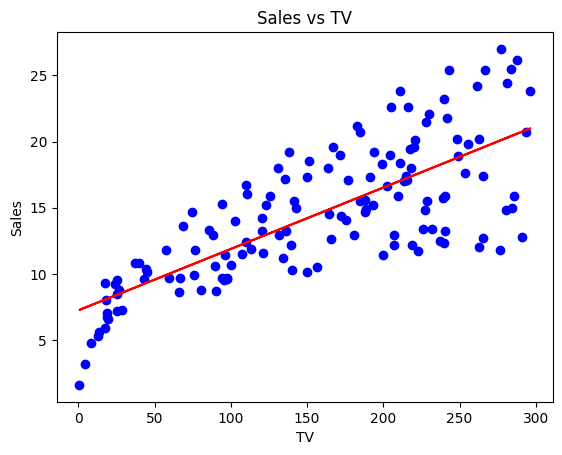

In [112]:
plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,model.predict(X_train),color="red")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV')

plt.show()

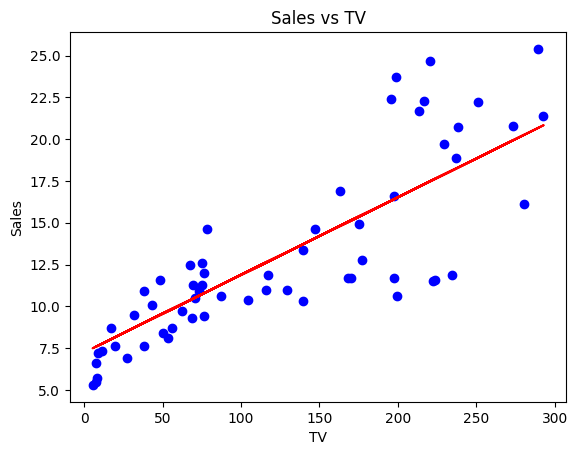

In [113]:
plt.scatter(X_test,y_test,color="blue")
plt.plot(X_test,model.predict(X_test),color="red")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV')

plt.show()

In [119]:
value = sum((y_test  - model_y_pred) ** 2) / sum((y_test - y_test.mean()) ** 2)
val = 1 - value
val

0.6714477229302767